/home/dhem/anaconda3/envs/pyscf/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/envs/pyscf/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/envs/pyscf/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/envs/pyscf/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Error (mHa)')

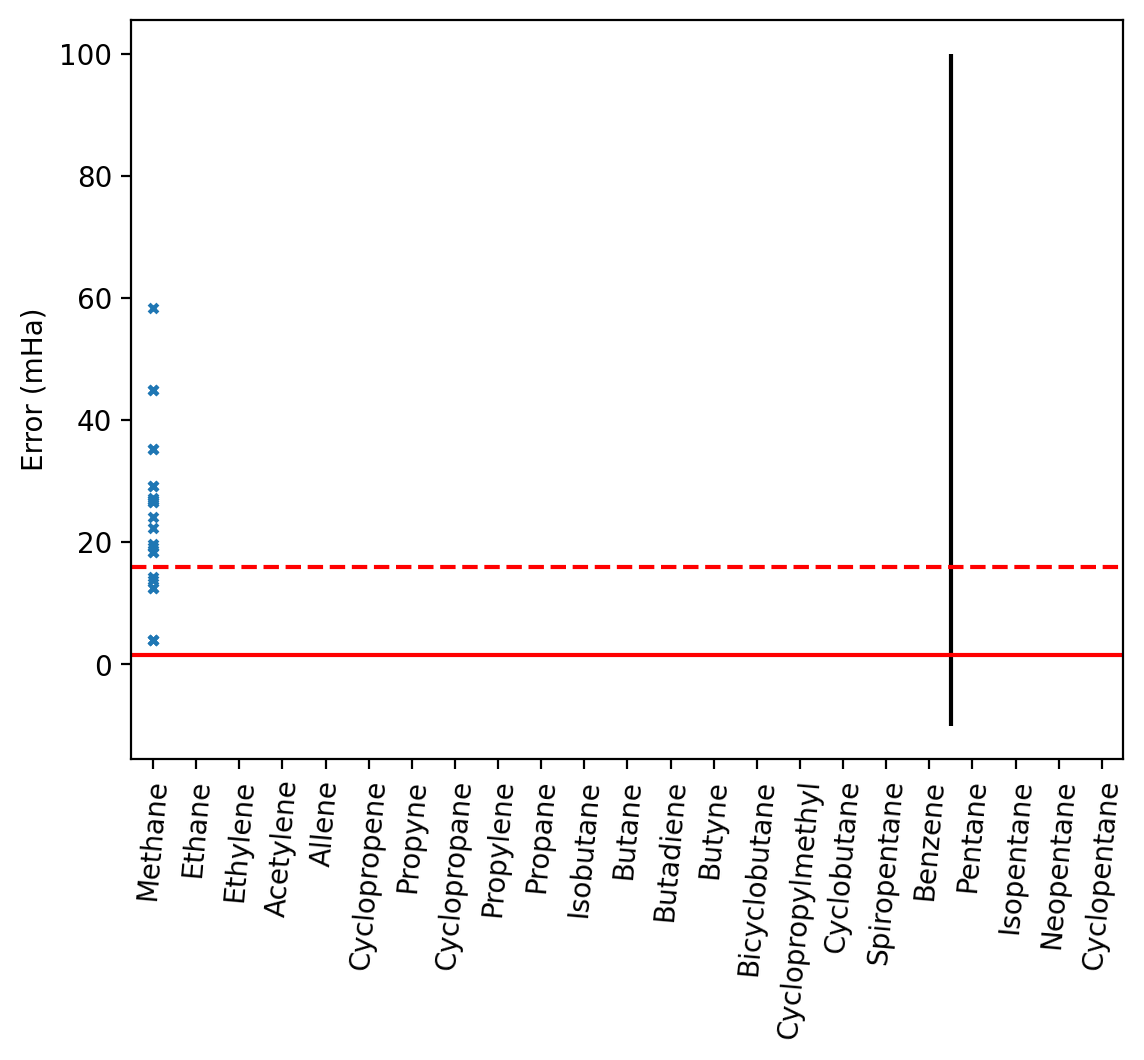

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Cyclopropene",
    "Propyne",
    "Cyclopropane",
    "Propylene",
    "Propane",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Bicyclobutane",
    "Cyclopropylmethyl",
    "Cyclobutane",
    "Spiropentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
    "Neopentane",
    "Cyclopentane",
    # "Hexane",
]

date = "2024-05-10-10-30-49"
# date = "2024-05-09-12-06-46"
data = pd.read_csv(f"./validate-{date}-400/train.csv")
error_l = []

for i, i_name in enumerate(TRAIN_STR_DICT):
    data_np = np.abs(data.filter(regex=(f"{i_name}.*")).to_numpy()[0, :])
    data_np_sort = np.sort(data_np)
    error_l.append(np.mean(np.abs(data_np_sort)))
    plt.scatter(i + np.zeros_like(data_np), data_np, s=10, marker="x")

i += 1
plt.vlines(i - 0.5, -10, 100, "k")
plt.hlines(1000 / 627.509, -0.5, 100 - 0.5, "r")
plt.hlines(10000 / 627.509, -0.5, 100 - 0.5, "r", linestyle="--")

data = pd.read_csv(f"./validate-{date}-400/eval.csv")
for j, j_name in enumerate(EVAL_STR_DICT):
    data_np = np.abs(data.filter(regex=(f"{j_name}.*")).to_numpy()[0, :])
    data_np_sort = np.sort(data_np)
    error_l.append(np.mean(np.abs(data_np_sort)))
    plt.scatter(i + j + np.zeros_like(data_np), data_np, s=10, marker="x")

plt.xticks(
    range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
    TRAIN_STR_DICT + EVAL_STR_DICT,
    rotation=85,
)
plt.plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l)
# plt.ylim(-20, 500)
plt.xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
plt.ylabel("Error (mHa)")
# plt.savefig("./manu/figures/energy.pdf", bbox_inches="tight")

In [9]:
data.filter(regex=("Methane.*"))

,Methane_0_1_-0.2500,Methane_0_1_-0.1250,Methane_0_1_0.0000,Methane_0_1_0.1250,Methane_0_1_0.2500,Methane_0_2_-0.2500,Methane_0_2_-0.1250,Methane_0_2_0.1250,Methane_0_2_0.2500,Methane_0_3_-0.2500,...,Methane_1_1_0.1250,Methane_1_1_0.2500,Methane_1_2_-0.2500,Methane_1_2_-0.1250,Methane_1_2_0.1250,Methane_1_2_0.2500,Methane_1_3_-0.2500,Methane_1_3_-0.1250,Methane_1_3_0.1250,Methane_1_3_0.2500
0,-3.303313,-19.488274,-5.961720,-14.614400,16.742106,16.742106,-14.614400,-19.488274,-3.303313,31.082965,...,1.861105,12.182781,-5.904322,-19.702848,-2.089225,5.616303,13.511931,2.076509,2.076509,13.511931
1,29.036549,21.817139,29.904784,16.849364,26.253980,26.253980,16.849364,21.817139,29.036549,30.486137,...,27.373549,46.288036,51.525650,31.400894,21.213841,33.609954,89.233024,54.220083,54.220083,89.233024
2,17.587013,-5.317925,-26.818801,1.157701,2.065653,2.065653,1.157701,-5.317925,17.587013,-14.764792,...,2.499640,11.944261,-23.097382,-17.501396,-2.983218,7.475945,0.790146,-13.296776,-13.296776,0.790146
3,3.922566,-12.616919,-3.155998,2.999865,15.357006,15.357006,2.999865,-12.616919,3.922566,-6.337195,...,7.328252,13.616605,-5.274393,10.909126,-2.618869,-4.191571,8.603670,-20.888587,-20.888587,8.603670
4,-2.189054,-0.582255,6.022999,0.794368,9.670285,9.670285,0.794368,-0.582255,-2.189054,-5.961901,...,-4.228770,-13.521970,12.687921,10.337482,-5.107293,-6.121054,-30.698182,-4.917557,-4.917557,-30.698182


14.577594728369137
13.124420522458408
193.1980737020845


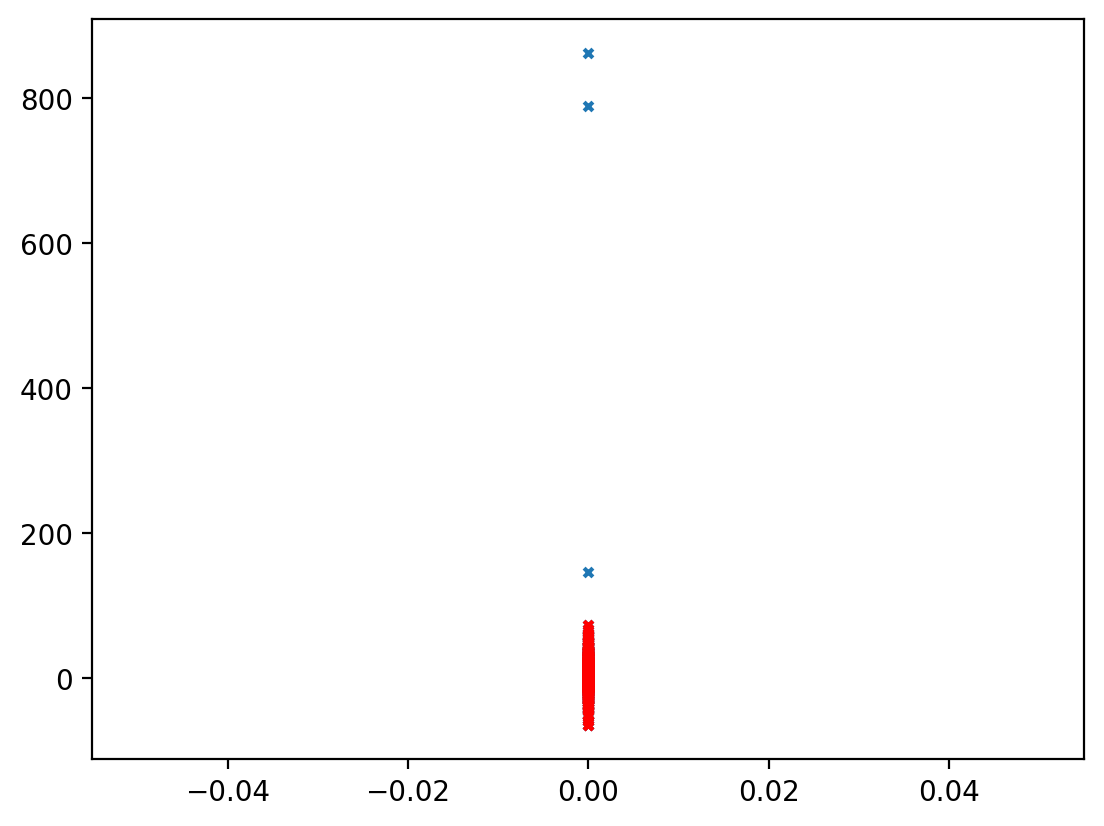

In [22]:
# from matplotlib import pyplot as plt
# import numpy as np

# data_np = data.to_numpy()[0, 2 : (21 * 2 * 3 - 5) * 10 + 2]
# plt.scatter(np.zeros_like(data_np), data_np, s=10, marker='x')
# data_np_sort = np.sort(data_np)
# print(np.mean(np.abs(data_np_sort)))

# data_remove = data_np_sort[:-3]
# print(np.mean(np.abs(data_remove)))
# plt.scatter(np.zeros_like(data_remove), data_remove, s=10, marker="x", c="red")

# data_np_2 = data.to_numpy()[0, (21 * 2 * 3 - 5) * 10 + 2:]
# print(np.mean(np.abs(data_np_2)))

In [6]:
print(np.linspace(-0.5, 0.5, 41))
print(np.linspace(-0.5, 0.5, 9))
print(np.linspace(-0.45, 0.425, 8))

[-0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475
  0.5  ]
[-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]
[-0.45  -0.325 -0.2   -0.075  0.05   0.175  0.3    0.425]
